In [76]:
import numpy as np
import matplotlib.pyplot as plt
import math

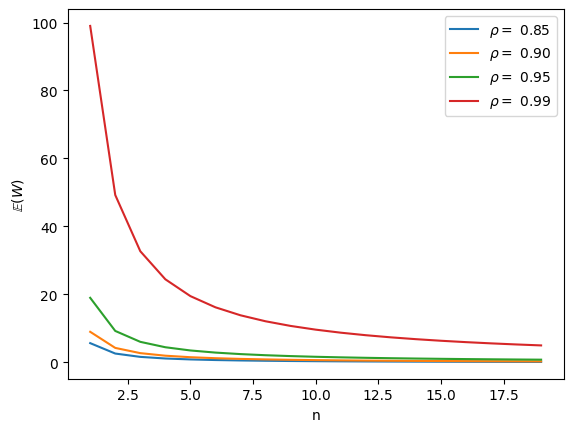

1 0.9 9.000000000000002
2 0.8526315789473684 4.2631578947368425
3 0.8170610211706102 2.7235367372353676
4 0.7877532642953624 1.9693831607384065
5 0.7624932207329357 1.5249864414658718
6 0.7401257002823095 1.2335428338038494
7 0.7199572931645486 1.028510418806498
8 0.7015329901462571 0.8769162376828216
9 0.6845351243953107 0.7605945826614564
10 0.668731524107697 0.6687315241076971
11 0.6539464100549334 0.5944967364135759
12 0.6400429131026534 0.5333690942522112
13 0.6269119981784765 0.4822399985988282
14 0.6144651392777791 0.43890367091269944
15 0.6026293005796057 0.40175286705307056
16 0.5913433938723898 0.3695896211702437
17 0.5805557138724274 0.3415033611014279
18 0.5702220404693223 0.3167900224829569
19 0.5603042074540865 0.2948969512916245
20 0.5507690048161176 0.27538450240805884
21 0.541587324259364 0.2578987258377924
22 0.5327334851583697 0.2421515841628954
23 0.5241846964706732 0.22790638976985794
24 0.5159206225282118 0.21496692605342163
25 0.5079230292077638 0.203169211683105

In [115]:
def summation(n, rho):
    result = 0

    for i in range(n):
        S = (((n * rho) ** i) / math.factorial(i))
        result += S
    return result

def delay_probability(n, rho):
    pi = (((n * rho)**n)/math.factorial(n))*(1/(((1-rho)*summation(n, rho)) + ((n * rho) ** n)/ math.factorial(n)))
    return pi

def waiting_time(n, rho, mu):
    W = delay_probability(n, rho)* (1/(1 - rho))*(1/n*mu)
    return W

rho_waiting_times = {}
rho_values = [0.85, 0.9, 0.95, 0.99]

for rho in rho_values:
    waiting_time_list = []
    for n in range(1,20):
        waiting_time_list.append(waiting_time(n, rho, 1))
    rho_waiting_times[f'rho = {rho}'] = waiting_time_list

for rho in rho_values:
    waiting_time_list = rho_waiting_times[f'rho = {rho}']
    plt.plot(range(1,20), waiting_time_list, label=r'$\rho =$ %.2f'%(rho))
# plt.title('Expected waiting time for increasing number of servers')
plt.ylabel(r'$\mathbb{E}(W)$')
plt.xlabel('n')
plt.legend()
plt.savefig('plots/Wtheory.png', dpi=300)
plt.show()

for i in range(1,31):
    print(i, delay_probability(i, 0.9), waiting_time(i, 0.9, 1))


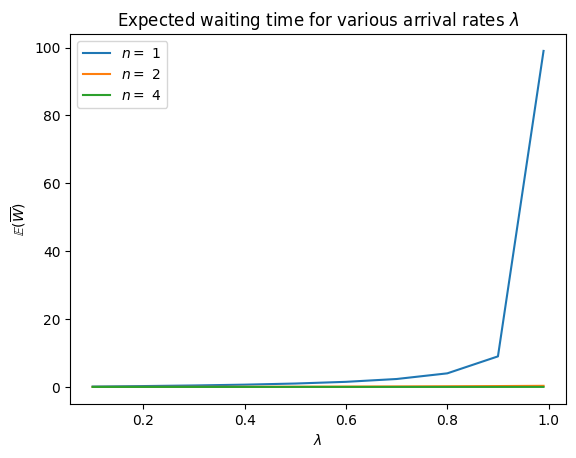

In [78]:
def rho(n, arrival_rate, mu):
    r = arrival_rate/(n*mu)
    return r

arrival_rate_list = list(np.arange(0.1,0.91,0.1))
arrival_rate_list.append(0.99)
mu = 1
n_values = [1,2,4]

n_waiting_times = {}
for n in n_values:
    waiting_time_list = []
    for arrival_rate in arrival_rate_list:
        rho_value = rho(n, arrival_rate, mu)
        waiting_time_list.append(waiting_time(n, rho_value, 1))
    n_waiting_times[f'n = {n}'] = waiting_time_list

for n in n_values:
    waiting_time_list = n_waiting_times[f'n = {n}']
    plt.plot(arrival_rate_list, waiting_time_list, label=r'$n =$ %i'%(n))
plt.title(r'Expected waiting time for various arrival rates $\lambda$')
plt.ylabel(r'$\mathbb{E}(\overline{W})$')
plt.xlabel(r'$\lambda$')
plt.legend()
# plt.yscale('log')
plt.show()


## Analysing $\Pi$ and its terms for growing $n$ and $\rho \lesssim 1$

In [114]:
n = 3
rho = 0.98

def first_term(n, rho):
    return ((n*rho)**(n))/math.factorial(n)


def denominator_term(n, rho):
    return (1-rho)*summation(n, rho) + first_term(n, rho)


def delay_prob_analysis(n, rho):
    return n, first_term(n, rho), (1-rho)*summation(n, rho), denominator_term(n, rho), (1-rho)*summation(n, rho)/first_term(n, rho)

for i in range(1, 50):
    print(delay_prob_analysis(i, 0.98))



(1, 0.98, 0.020000000000000018, 1.0, 0.02040816326530614)
(2, 1.9207999999999998, 0.05920000000000005, 1.98, 0.03082049146189091)
(3, 4.235364, 0.16523600000000013, 4.4006, 0.039013411834260325)
(4, 9.838593706666666, 0.45285162666666706, 10.291445333333334, 0.046028084924353896)
(5, 23.539604083333344, 1.2306634166666683, 24.770267500000013, 0.05228054865791096)
(6, 57.40258627998719, 3.328641205452803, 60.731227485439994, 0.05798765214544521)
(7, 141.85291786242126, 8.976387459499291, 150.82930532192054, 0.0632795404899969)
(8, 354.0038441137771, 24.15779538853293, 378.16163950231004, 0.06824161881351942)
(9, 890.1316294839022, 64.92043693104337, 955.0520664149456, 0.07293352441445565)
(10, 2251.6336168638322, 174.27386655925793, 2425.90748342309, 0.07739885621444652)
(11, 5723.354562315284, 467.4299985825136, 6190.784560897798, 0.08167063450170434)
(12, 14606.659210002283, 1252.8800612376044, 15859.539271239886, 0.08577458015722465)
(13, 37404.36166826087, 3356.337958736405, 40760.6